# ADSP Final Project Stock Price Prediction 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import Data as data
import Model as model 
from statsmodels.tsa.arima.model import ARIMA

## 0. Data Fetching 

In [2]:
MSFT = data.get_ETF_data('MSFT', '2000-01-01', '2024-01-01')
#MSFT.to_csv('msft.csv', index=True)

In [3]:
train_msft, val_msft, test_msft = data.split_time_series(MSFT, 0.6,0.2)
#train_msft.to_csv('train_msft.csv', index=True)
#val_msft.to_csv('val_msft.csv', index=True)
#test_msft.to_csv('test_msft.csv', index=True)

In [4]:
display(MSFT.head(5))

,adj_close
date,
2000-01-03,36.263777
2000-01-04,35.037977
2000-01-05,35.408206
2000-01-06,34.222851
2000-01-07,34.670859


## 1. EDA 

In [5]:
data.check_data_summary(MSFT)

Number of rows: 6037
Number of columns: 1
Column names:
Index(['adj_close'], dtype='object')
Data types:
adj_close    float64
dtype: object
Summary statistics:
         adj_close
count  6037.000000
mean     72.005855
std      90.181050
min      11.323847
25%      19.070101
50%      23.766328
75%      80.339023
max     382.000349
Missing values:
adj_close    0
dtype: int64
No duplicated index values.


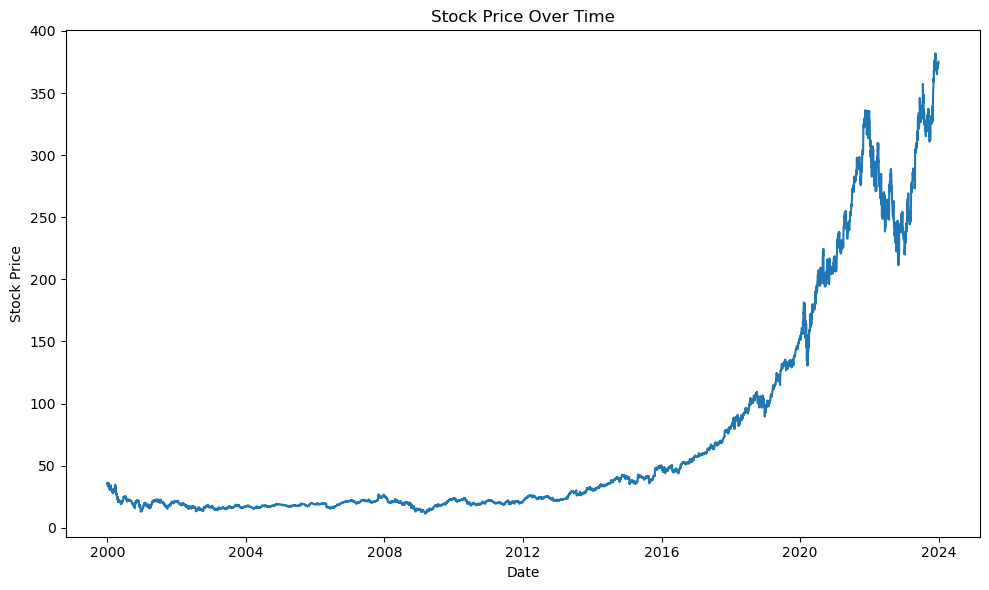

In [6]:
data.plot_stock_price(MSFT)

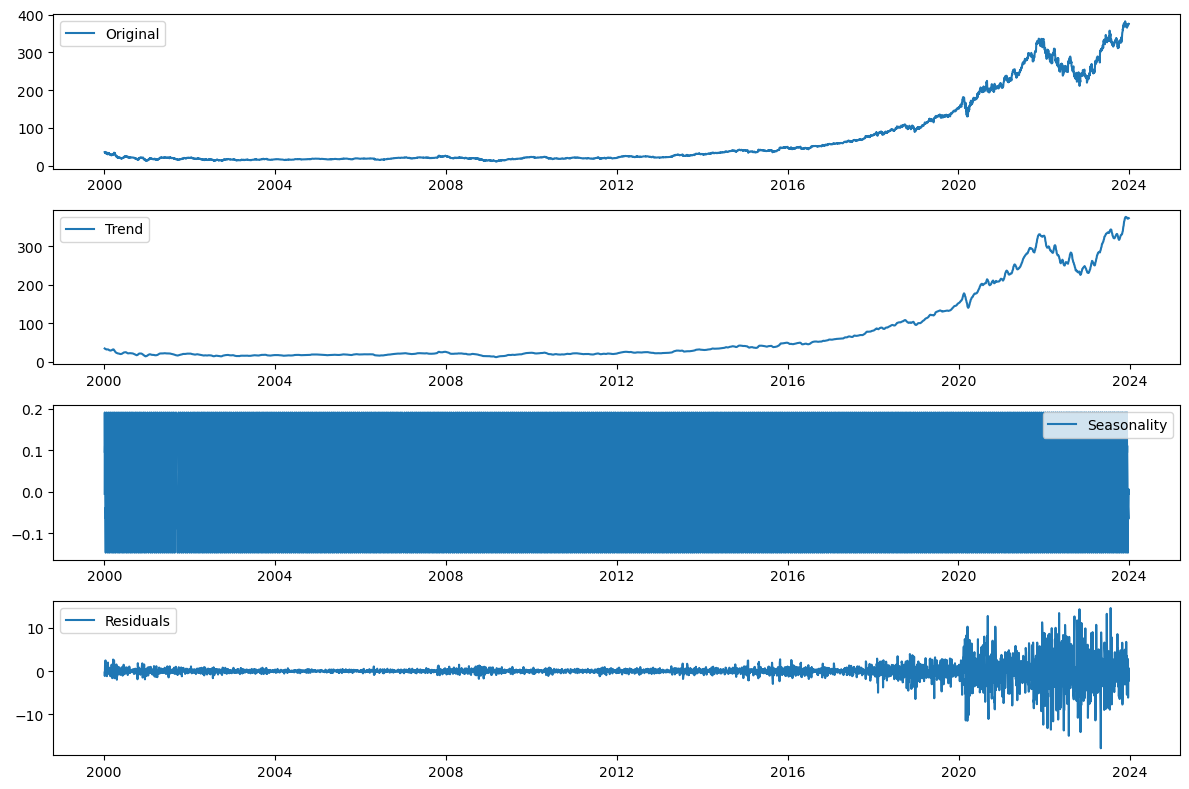

In [7]:
data.decompose_and_plot(MSFT,12)

In [8]:
data.check_stationarity(train_msft)

Results of Dickey-Fuller Test for adj_close:
Test Statistic                   -2.271114
p-value                           0.181453
#Lags Used                       21.000000
Number of Observations Used    3600.000000
Critical Value (1%)              -3.432168
Critical Value (5%)              -2.862343
Critical Value (10%)             -2.567198
dtype: float64
Results of KPSS Test for adj_close:
Test Statistic            2.781718
p-value                   0.010000
Lags Used                38.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
adj_close time series data is not stationary


<Figure size 600x300 with 0 Axes>

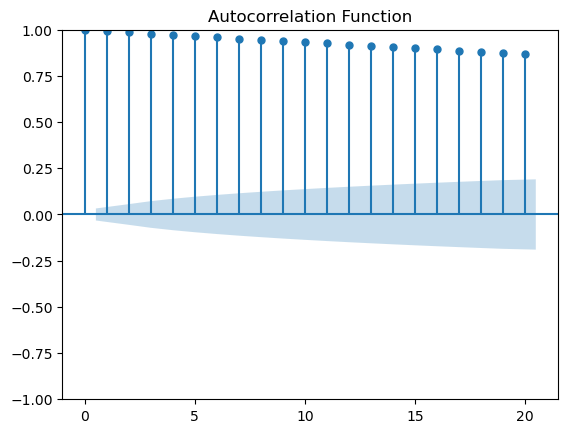

<Figure size 600x300 with 0 Axes>

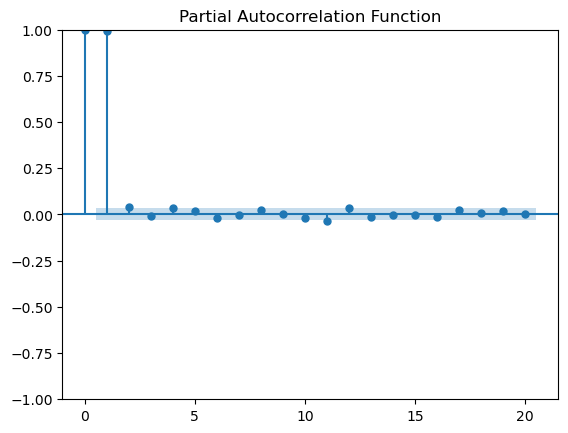

In [9]:
data.plot_time_series_analysis(train_msft,'adj_close')

## ?.ARIMA 

In [10]:
model.check_num_stationarity(train_msft['adj_close'])

The time series data is stationary.
Number of differencing needed is: 1


In [11]:
train_msft_diff = train_msft.loc[:,['adj_close']].diff().dropna()
data.check_stationarity(train_msft_diff)

Results of Dickey-Fuller Test for adj_close:
Test Statistic                -1.358594e+01
p-value                        2.080465e-25
#Lags Used                     2.000000e+01
Number of Observations Used    3.600000e+03
Critical Value (1%)           -3.432168e+00
Critical Value (5%)           -2.862343e+00
Critical Value (10%)          -2.567198e+00
dtype: float64
Results of KPSS Test for adj_close:
Test Statistic           0.442817
p-value                  0.058700
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
adj_close time series data is stationary


<Figure size 600x300 with 0 Axes>

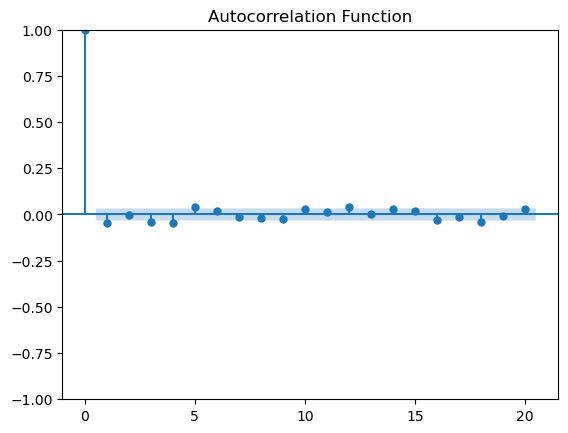

<Figure size 600x300 with 0 Axes>

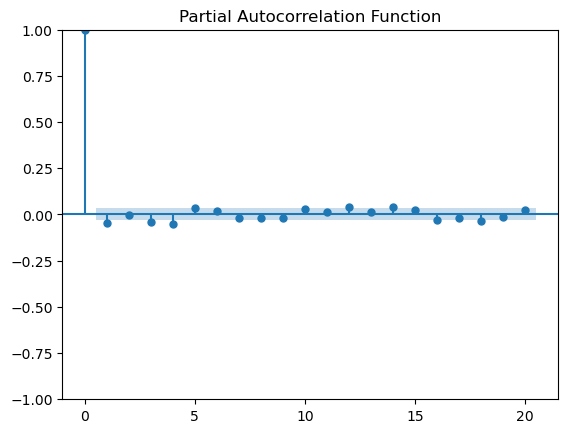

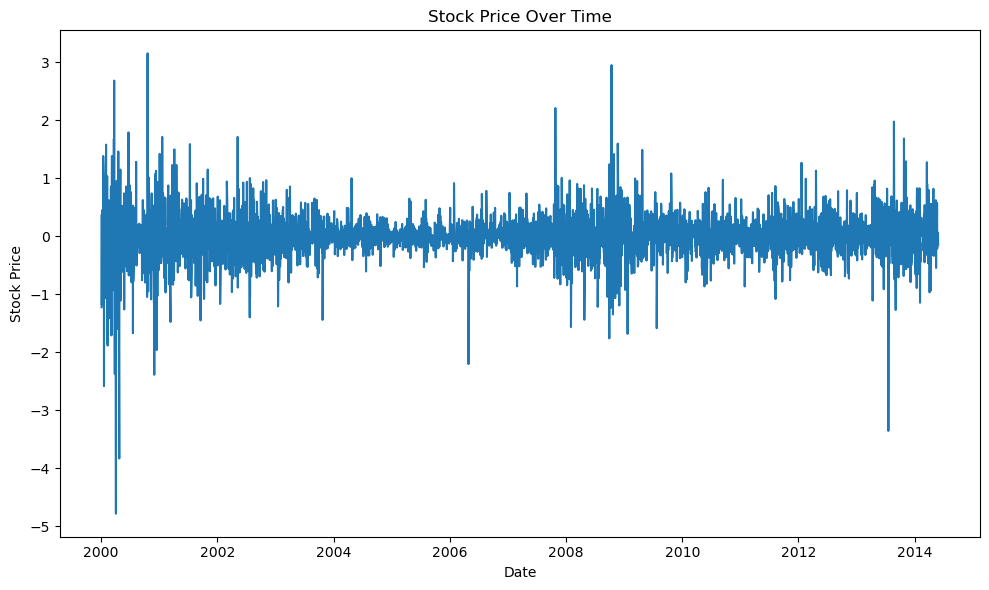

In [12]:
data.plot_time_series_analysis(train_msft_diff,'adj_close')
data.plot_stock_price(train_msft_diff)

In [18]:
arma_model = ARIMA(train_msft, order=(0,1,0))
model_fit = arma_model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              adj_close   No. Observations:                 3622
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1931.915
Date:                Fri, 03 May 2024   AIC                           3865.829
Time:                        10:24:29   BIC                           3872.024
Sample:                             0   HQIC                          3868.036
                               - 3622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1702      0.001    117.551      0.000       0.167       0.173
Ljung-Box (L1) (Q):                   7.41   Jarque-Bera (JB):             26821.14
Prob(Q):                              0.01   Pr

In [19]:
arma_model_1 = ARIMA(train_msft, order=(1,1,1))
model_fit_1 = arma_model_1.fit()
print(model_fit_1.summary())

                               SARIMAX Results                                
Dep. Variable:              adj_close   No. Observations:                 3622
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1926.622
Date:                Fri, 03 May 2024   AIC                           3859.244
Time:                        10:24:33   BIC                           3877.827
Sample:                             0   HQIC                          3865.864
                               - 3622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5897      0.128      4.599      0.000       0.338       0.841
ma.L1         -0.6335      0.122     -5.184      0.000      -0.873      -0.394
sigma2         0.1697      0.001    116.852      0.0

In [20]:
arma_model_2 = ARIMA(train_msft, order=(5,1,5))
model_fit_2 = arma_model_2.fit()
print(model_fit_2.summary())

                               SARIMAX Results                                
Dep. Variable:              adj_close   No. Observations:                 3622
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1915.753
Date:                Fri, 03 May 2024   AIC                           3853.506
Time:                        10:24:37   BIC                           3921.646
Sample:                             0   HQIC                          3877.782
                               - 3622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2488      0.602      0.413      0.679      -0.931       1.429
ar.L2         -0.3105      0.361     -0.860      0.390      -1.018       0.398
ar.L3         -0.0402      0.305     -0.131      0.8

Ljung-Box Test Results:


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,11.077737,0.351494,11.053493,0.353366


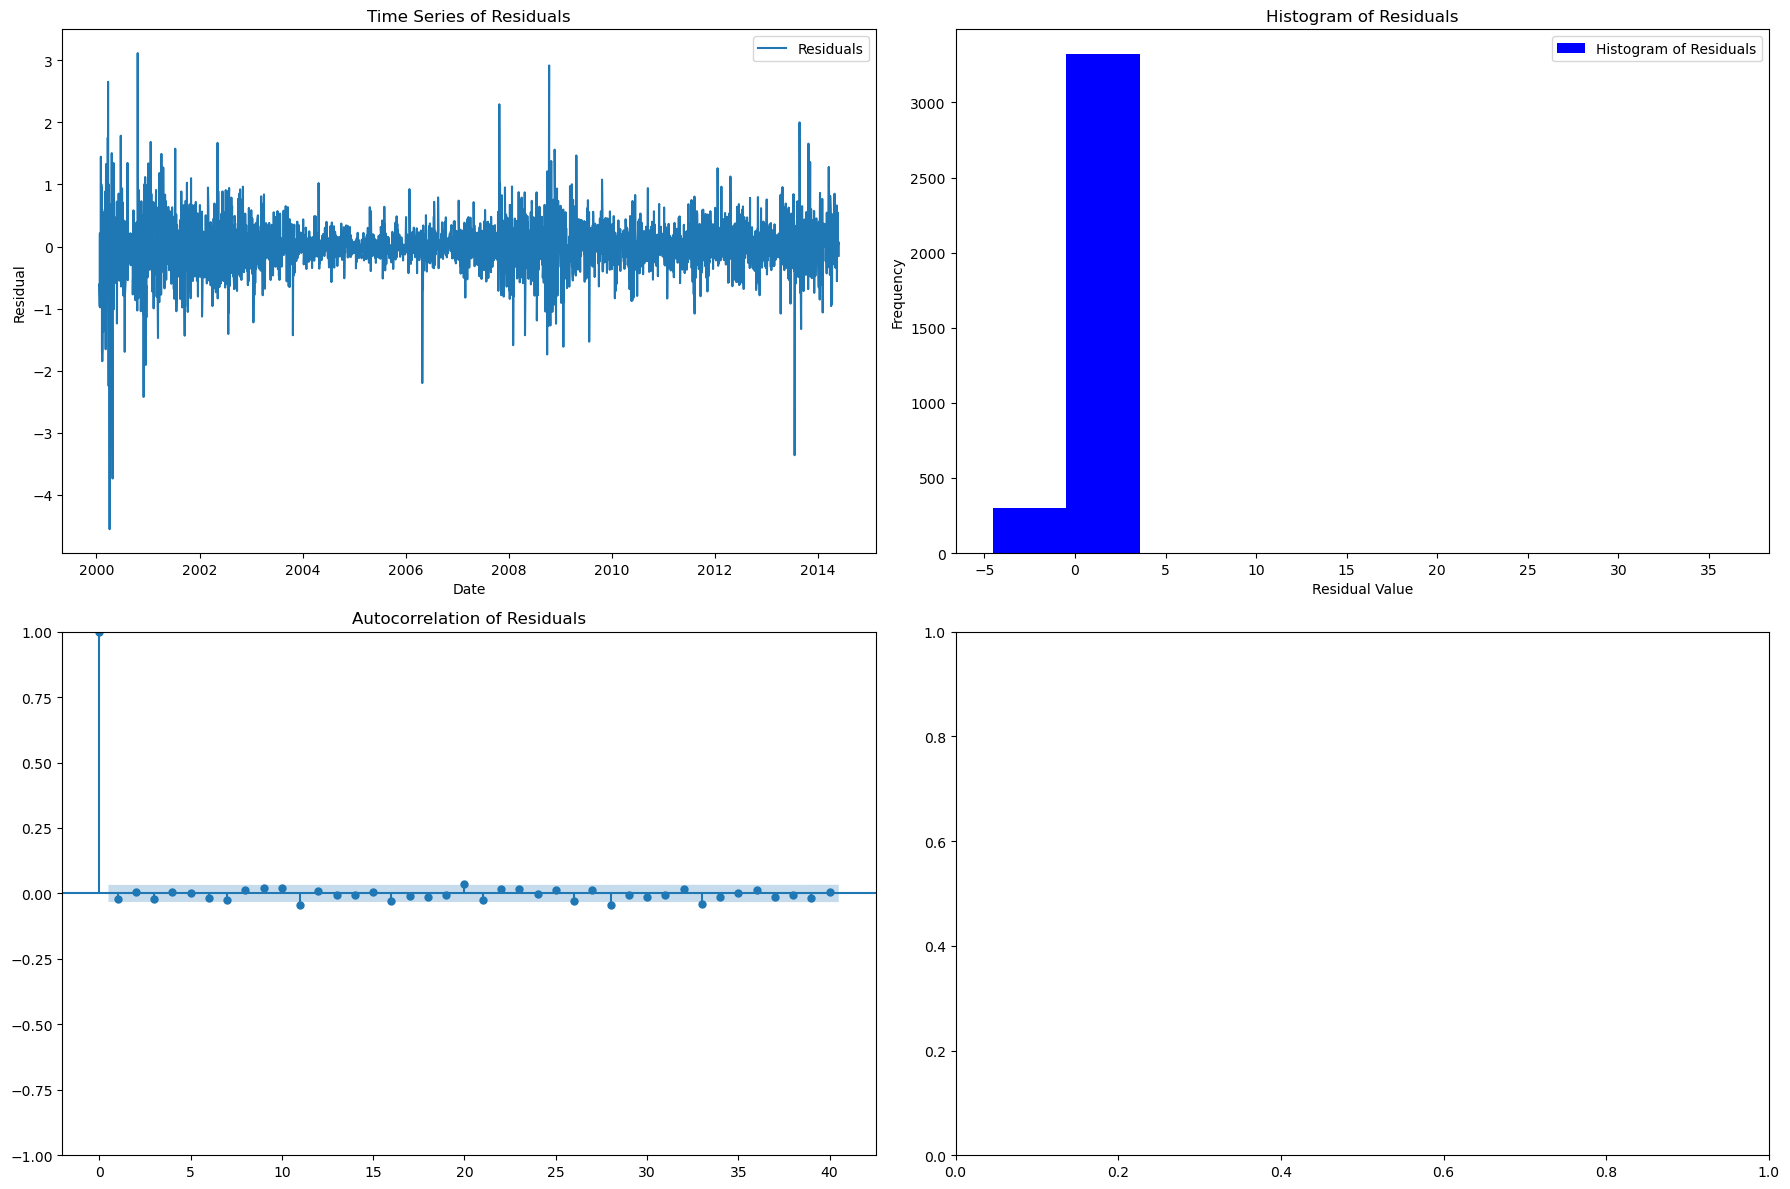

In [21]:
model.analyze_residuals(model_fit_2.resid)

In [25]:
predictions_arima = model_fit_2.forecast(steps = len(val_msft))
model.evaluate_forecast(val_msft['adj_close'], predictions_arima)

,MAE,MSE,MAPE (%),sMAPE (%)
0,27.489173,1277.371678,37.196775,49.73687


In [27]:
predictions_arima = model_fit_1.forecast(steps = len(val_msft))
model.evaluate_forecast(val_msft['adj_close'], predictions_arima)

,MAE,MSE,MAPE (%),sMAPE (%)
0,27.501341,1278.039703,37.219105,49.769285


In [28]:
predictions_arima = model_fit.forecast(steps = len(val_msft))
model.evaluate_forecast(val_msft['adj_close'], predictions_arima)

,MAE,MSE,MAPE (%),sMAPE (%)
0,27.510039,1278.518786,37.235041,49.792457


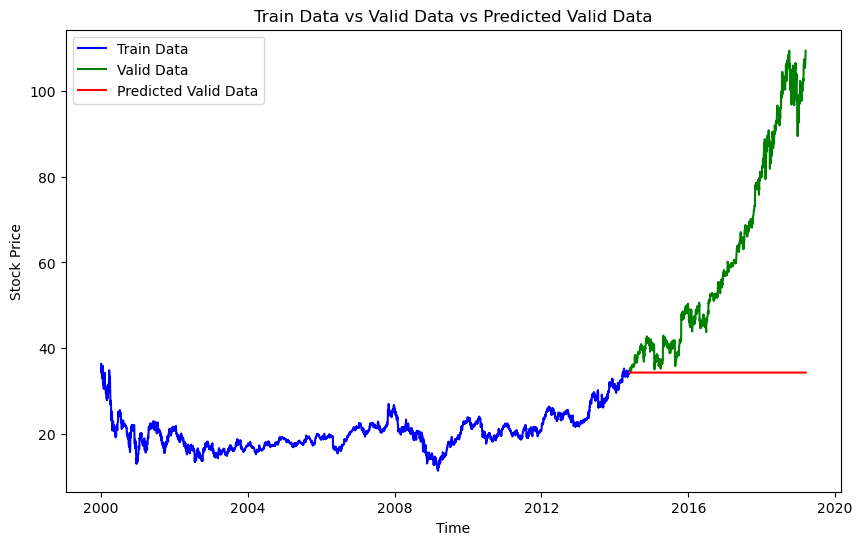

In [26]:
model.plot_line_graph(train_msft['adj_close'], val_msft['adj_close'], predictions_arima)